clustering

先匯入資料dataset1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 匯入數據
data = pd.read_csv('dataset1.csv')


# 假設數據集有兩個特徵列 'Feature1' 和 'Feature2'
X = data[['x', 'y']].values

# 檢查數據筆數
num_rows = data.shape[0]
print(f'The number of rows in the data is: {num_rows}')


The number of rows in the data is: 1273


檢查原始資料

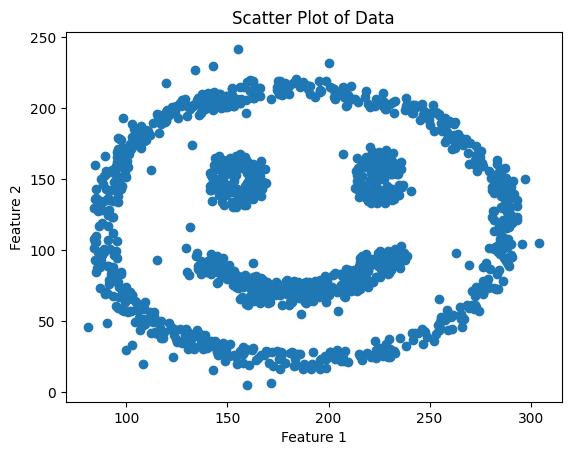

In [ ]:
# 假設數據集有兩個特徵列 'x' 和 'y'
# 如果有更多特徵，請根據需要調整
if 'x' in data.columns and 'y' in data.columns:
    X = data[['x', 'y']].values

    # 繪製散點圖
    plt.scatter(X[:, 0], X[:, 1])
    plt.title("Scatter Plot of Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("The CSV file does not contain the required columns 'Feature1' and 'Feature2'.")

k-means-clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


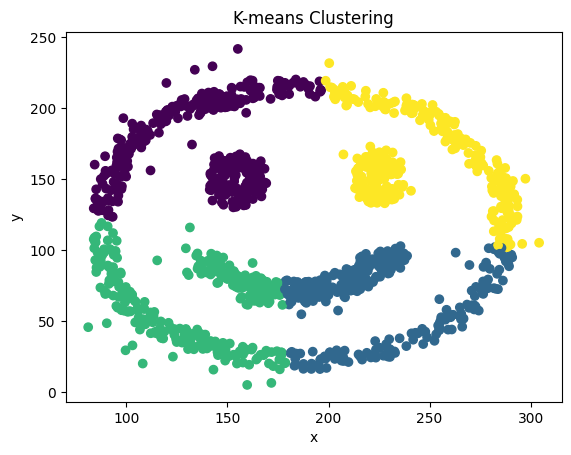

In [ ]:
# 設定K-means分群的參數
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# 執行K-means分群
y_pred = kmeans.fit_predict(X)

# 繪製分群結果
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-means Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

fuzzy-c-means

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=f7734d20092a71ad367e229fd552cf17f9a6388e54ee5b24196168d29f5fe114
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


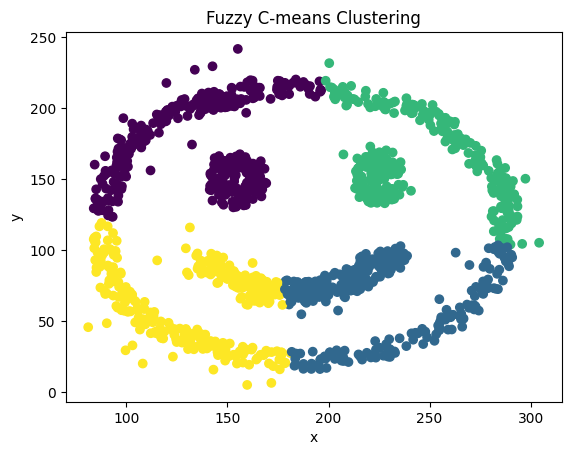

In [ ]:
import skfuzzy as fuzz
# 4. 假設數據集有兩個特徵列 'Feature1' 和 'Feature2'
if 'x' in data.columns and 'y' in data.columns:
    X = data[['x', 'y']].values.T  # 轉置數據以適應skfuzzy的輸入格式

    # 5. 設定Fuzzy C-means聚類的參數
    n_clusters = 4
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X, n_clusters, 2, error=0.005, maxiter=1000, init=None)

    # 6. 獲取每個數據點的聚類結果
    cluster_membership = np.argmax(u, axis=0)

    # 7. 繪製聚類結果
    plt.scatter(X[0, :], X[1, :], c=cluster_membership, cmap='viridis')
    plt.title("Fuzzy C-means Clustering")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
else:
    print("The CSV file does not contain the required columns 'Feature1' and 'Feature2'.")

mountain

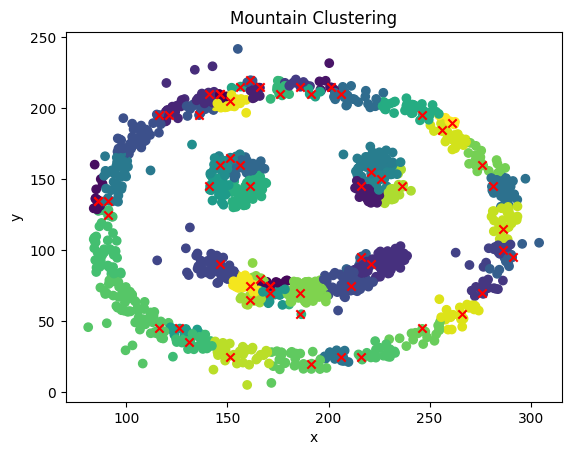

Number of clusters found: 58
Number of iterations performed: 58


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def mountain_clustering(data, grid_size, sigma, threshold, max_iterations):
    # Step 1: Create a grid over the data range
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    x_range = np.arange(x_min, x_max, grid_size)
    y_range = np.arange(y_min, y_max, grid_size)
    grid = np.array([(x, y) for x in x_range for y in y_range])

    # Step 2: Compute the mountain function for each grid point
    mountains = np.zeros(len(grid))
    for i, g in enumerate(grid):
        distances = np.linalg.norm(data - g, axis=1)
        mountains[i] = np.sum(np.exp(-distances**2 / (2 * sigma**2)))

    # Step 3: Find cluster centers dynamically
    cluster_centers = []
    iterations = 0
    while iterations < max_iterations:
        max_index = np.argmax(mountains)
        max_value = mountains[max_index]
        if max_value < threshold:
            break
        cluster_center = grid[max_index]
        cluster_centers.append(cluster_center)

        # Remove the influence of the selected cluster center
        distances = np.linalg.norm(grid - cluster_center, axis=1)
        mountains -= np.exp(-distances**2 / (2 * sigma**2))

        iterations += 1  # Increment iteration count

    # Step 4: Assign data points to the nearest cluster center
    cluster_centers = np.array(cluster_centers)
    labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - cluster_centers, axis=2), axis=1)

    return cluster_centers, labels, iterations

# 讀取數據
data_values = data[['x', 'y']].values

# 設定參數
grid_size = 5  #grid_size和數據數值比利差太多，會導致運算時間過久
sigma = 0.5
threshold = 0.5  # 可調整的山峰高度閾值
max_iterations = 1000  # 設定最大迭代次數

# 執行Mountain clustering
centers, labels, actual_iterations  = mountain_clustering(data_values, grid_size, sigma, threshold, max_iterations)

# 繪製結果
plt.scatter(data_values[:, 0], data_values[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x')  # 標記簇中心
plt.title("Mountain Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"Number of clusters found: {len(centers)}")
print(f"Number of iterations performed: {actual_iterations}")

substractive clustering

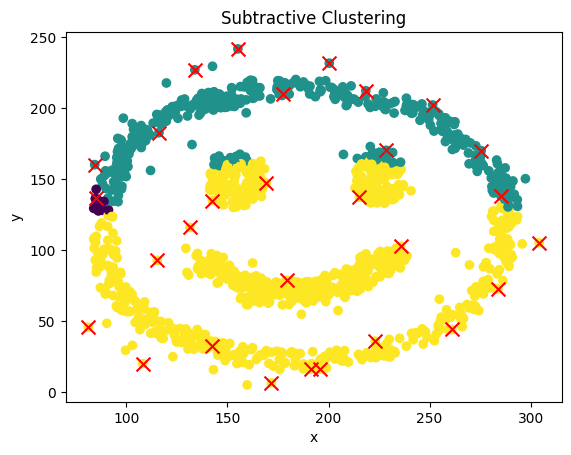

Number of clusters found: 29


In [ ]:
def subtractive_clustering(data, radius, max_iterations):
    # Step 1: Compute potential for each data point
    potentials = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        diff = data - data[i, :]
        potentials[i] = np.sum(np.exp(-np.sum(diff**2, axis=1) / (radius / 2)**2))

    # Step 2: Initialize cluster centers list
    cluster_centers = []
    labels = np.full(data.shape[0], -1)

    iterations = 0
    while iterations < max_iterations:
        # Step 3: Find the point with the highest potential
        max_potential_idx = np.argmax(potentials)
        max_potential = potentials[max_potential_idx]

        if max_potential < 1e-5:  # Threshold to stop clustering
            break

        # Step 4: Select the new cluster center
        cluster_center = data[max_potential_idx]
        cluster_centers.append(cluster_center)

        # Step 5: Update potentials
        diff = data - cluster_center
        potentials -= max_potential * np.exp(-np.sum(diff**2, axis=1) / (radius / 4)**2)

        # Assign labels to points in the new cluster's vicinity
        labels[np.linalg.norm(data - cluster_center, axis=1) < radius] = len(cluster_centers) - 1

    return np.array(cluster_centers), labels, iterations



# 设置参数
radius = 150  # 设置减法聚类的半径参数
max_iterations = 1000
# 执行 Subtractive Clustering
centers, labels, iterations = subtractive_clustering(data_values, radius, max_iterations)

# 绘制结果
plt.scatter(data_values[:, 0], data_values[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100)  # 标记簇中心
plt.title("Subtractive Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"Number of clusters found: {len(centers)}")

dataset2

k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 country  cluster
0            Afghanistan        1
1                Albania        2
2                Algeria        2
3                 Angola        1
4    Antigua and Barbuda        2
..                   ...      ...
162              Vanuatu        2
163            Venezuela        2
164              Vietnam        2
165                Yemen        1
166               Zambia        1

[167 rows x 2 columns]


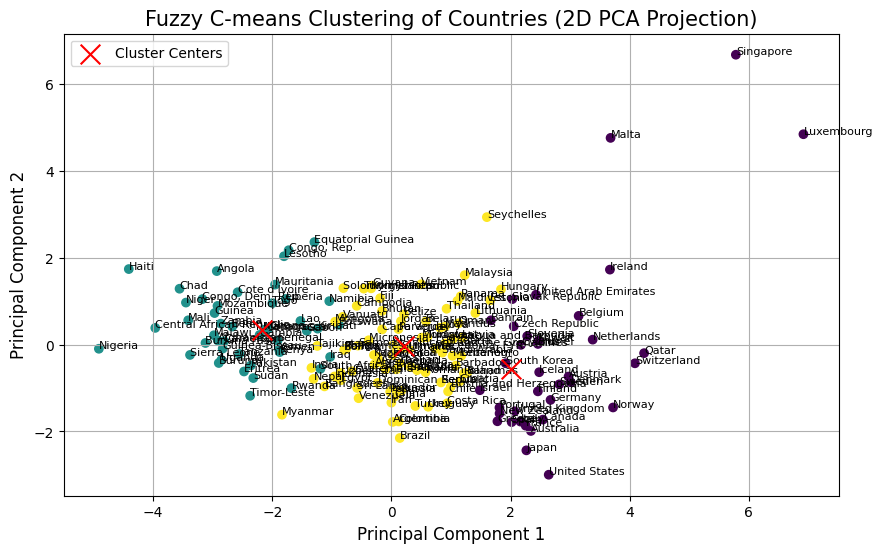

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 匯入數據
data2 = pd.read_csv('dataset2.csv')

# 假設數據集有兩個特徵列 'Feature1' 和 'Feature2'
features  = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
X = data2[features].values

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 K-means 聚类
n_clusters = 3  # 设置聚类的数量
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# 将聚类结果添加到原始数据中
data2['cluster'] = labels

# 打印每个国家的聚类结果
print(data2[['country', 'cluster']])

# 使用 PCA 将数据降维到 2D 或 3D 以便可视化
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
cntr_2d = pca.transform(cntr)

# 绘制 2D 聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')
for i, country in enumerate(data2['country']):
    plt.text(X_2d[i, 0], X_2d[i, 1], country, fontsize=8)

plt.scatter(cntr_2d[:, 0], cntr_2d[:, 1], color='red', marker='x', s=200, label='Cluster Centers', zorder=5)


plt.title('Fuzzy C-means Clustering of Countries (2D PCA Projection)', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

fuzzy-c-means

                 country  cluster
0            Afghanistan        2
1                Albania        0
2                Algeria        0
3                 Angola        2
4    Antigua and Barbuda        0
..                   ...      ...
162              Vanuatu        0
163            Venezuela        0
164              Vietnam        0
165                Yemen        2
166               Zambia        2

[167 rows x 2 columns]


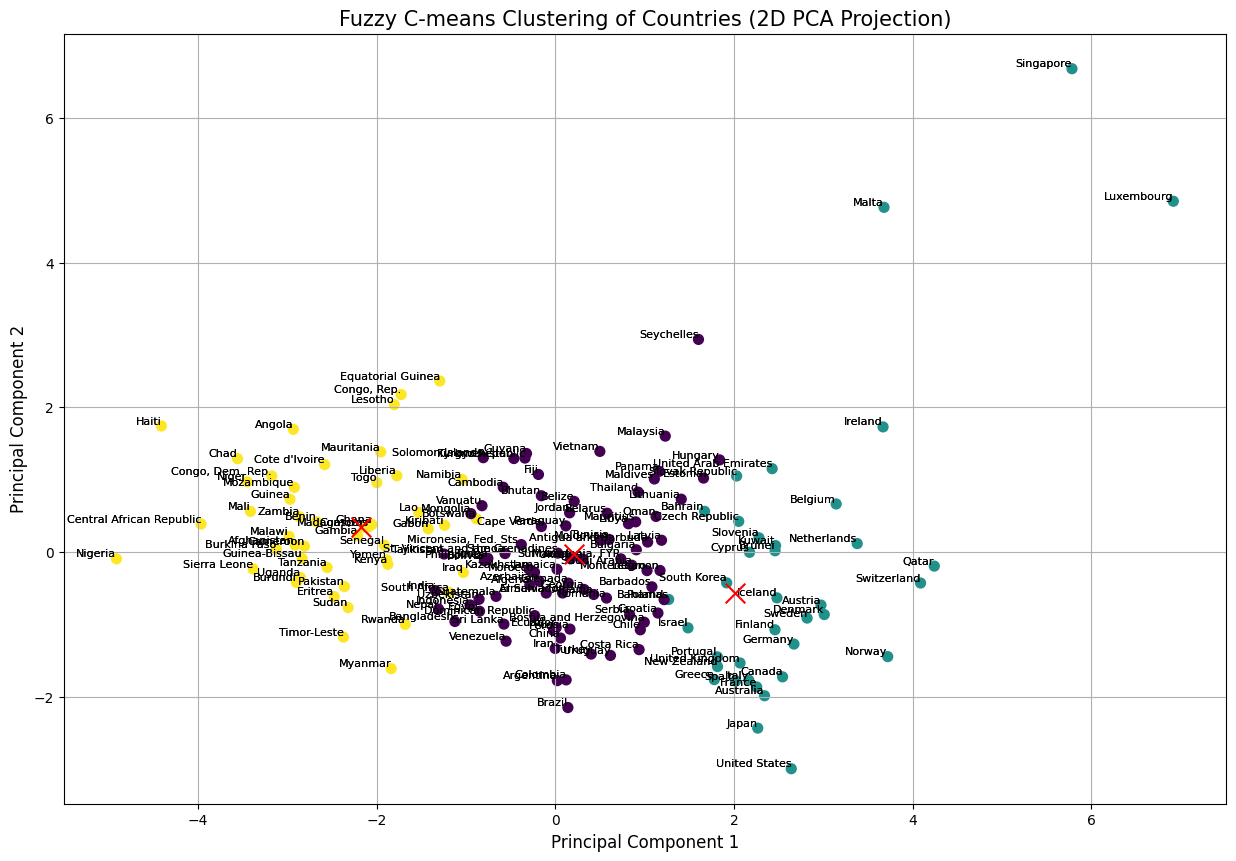

In [ ]:
import skfuzzy as fuzz
# 使用 Fuzzy C-means 聚类
n_clusters = 3  # 设置聚类的数量
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000)

# 获取每个数据点的聚类结果
cluster_membership = np.argmax(u, axis=0)

# 将聚类结果添加到原始数据中
data2['cluster'] = cluster_membership

# 打印每个国家的聚类结果
print(data2[['country', 'cluster']])

# 使用 PCA 将数据降维到 2D 以便可视化
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# 绘制 2D 聚类结果
plt.figure(figsize=(15, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_membership, cmap='viridis', s=50)
for i, country in enumerate(data2['country']):
    plt.text(X_2d[i, 0], X_2d[i, 1], country, fontsize=8, ha='right', va='bottom')
# 标出每个簇的中心
cntr_2d = pca.transform(cntr)
plt.scatter(cntr_2d[:, 0], cntr_2d[:, 1], color='red', marker='x', s=200, label='Cluster Centers', zorder=5)
for i, country in enumerate(data2['country']):
    plt.text(X_2d[i, 0], X_2d[i, 1], country, fontsize=8, ha='right', va='bottom')
plt.title('Fuzzy C-means Clustering of Countries (2D PCA Projection)', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.show()

mountain-clustering

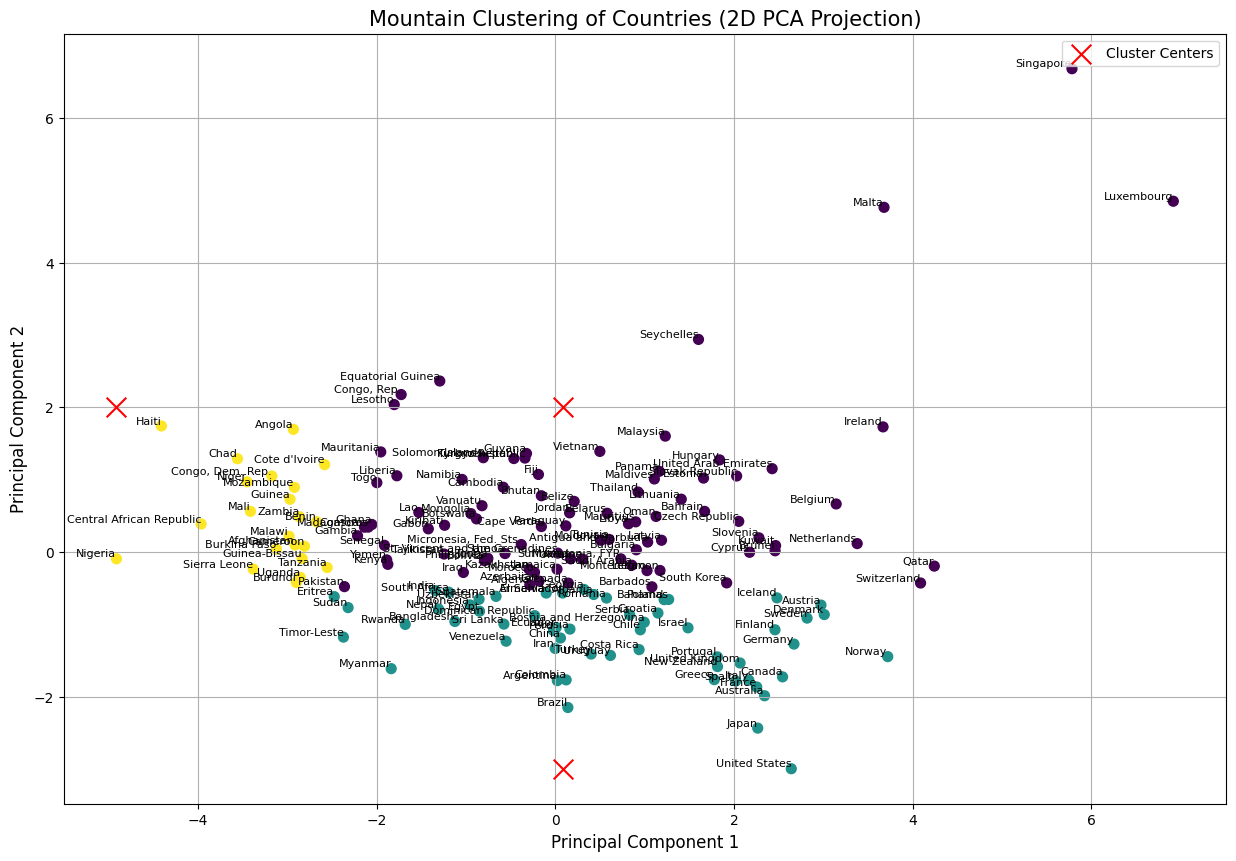

3


In [ ]:
def mountain_clustering(data, grid_size, sigma, threshold, max_iterations):
    # Step 1: Create a grid over the data range
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    x_range = np.arange(x_min, x_max, grid_size)
    y_range = np.arange(y_min, y_max, grid_size)
    grid = np.array([(x, y) for x in x_range for y in y_range])

    # Step 2: Compute the mountain function for each grid point
    mountains = np.zeros(len(grid))
    for i, g in enumerate(grid):
        distances = np.linalg.norm(data - g, axis=1)
        mountains[i] = np.sum(np.exp(-distances**2 / (2 * sigma**2)))

    # Step 3: Find cluster centers dynamically with a maximum iteration limit
    cluster_centers = []
    iterations = 0
    while iterations < max_iterations:
        max_index = np.argmax(mountains)
        max_value = mountains[max_index]
        if max_value < threshold:
            break
        cluster_center = grid[max_index]
        cluster_centers.append(cluster_center)

        # Remove the influence of the selected cluster center
        distances = np.linalg.norm(grid - cluster_center, axis=1)
        mountains -= max_value * np.exp(-distances**2 / (2 * sigma**2))

        iterations += 1  # Increment iteration count

    # Step 4: Assign data points to the nearest cluster center
    cluster_centers = np.array(cluster_centers)
    labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - cluster_centers, axis=2), axis=1)

    return cluster_centers, labels, iterations

# 使用 PCA 将数据降维到 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# 设置 Mountain Clustering 的参数
grid_size = 5  # 可以根据数据范围调整
sigma = 1  # 高斯函数的标准差，可以根据需要调整
threshold = 1  # 山峰函数的阈值，用于停止聚类
max_iterations = 1000  # 最大迭代次数

# 执行 Mountain Clustering
centers, labels, actual_iterations = mountain_clustering(X_2d, grid_size, sigma, threshold, max_iterations)

# 绘制 2D 聚类结果
plt.figure(figsize=(15, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
for i, country in enumerate(data2['country']):
    plt.text(X_2d[i, 0], X_2d[i, 1], country, fontsize=8, ha='right', va='bottom')

# 标出每个簇的中心
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers', zorder=5)

plt.title('Mountain Clustering of Countries (2D PCA Projection)', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print(actual_iterations)

substractive clustering

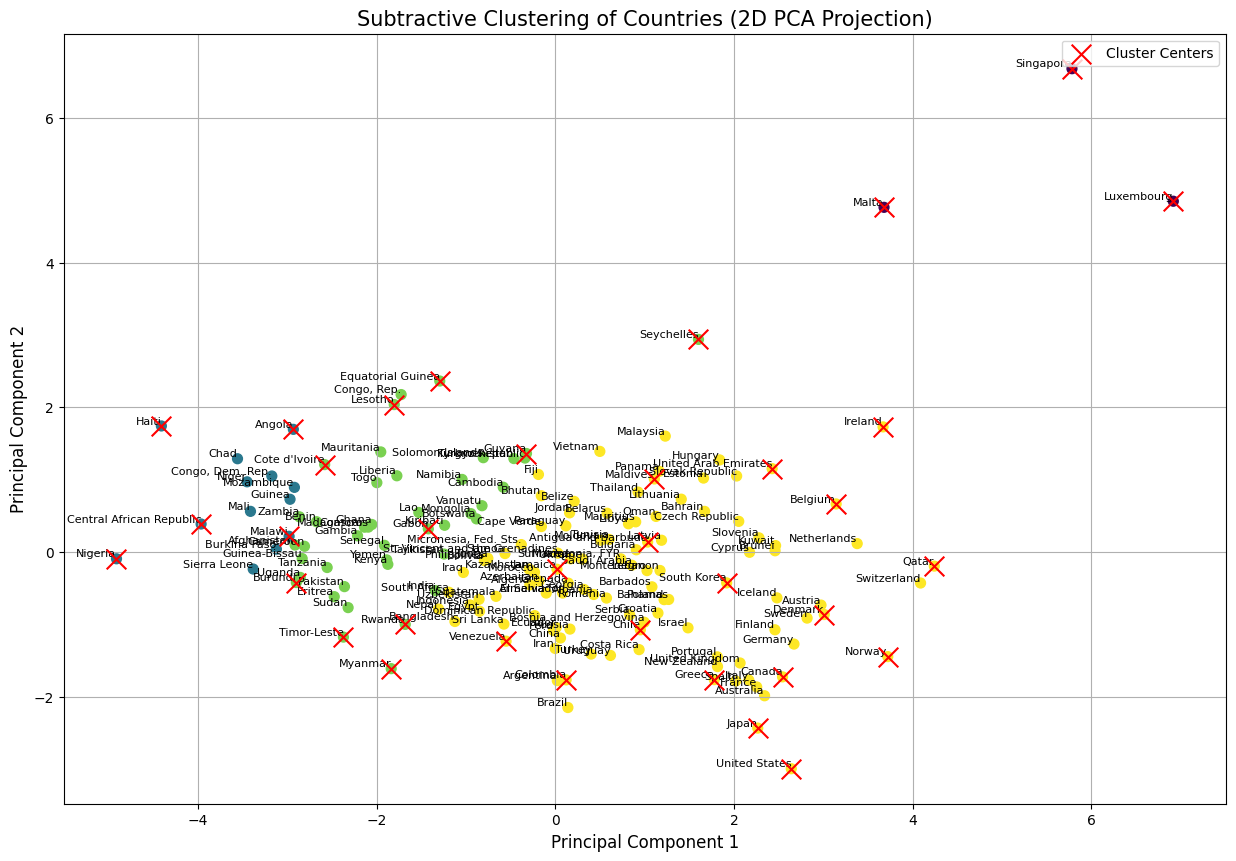

35


In [ ]:
def subtractive_clustering(data, radius, max_iterations):
    # Step 1: Compute potential for each data point
    potentials = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        diff = data - data[i, :]
        potentials[i] = np.sum(np.exp(-np.sum(diff**2, axis=1) / (radius / 2)**2))

    # Step 2: Initialize cluster centers list
    cluster_centers = []
    labels = np.full(data.shape[0], -1)

    iterations = 0
    while iterations < max_iterations:
        # Step 3: Find the point with the highest potential
        max_potential_idx = np.argmax(potentials)
        max_potential = potentials[max_potential_idx]

        if max_potential < 1e-5:  # Threshold to stop clustering
            break

        # Step 4: Select the new cluster center
        cluster_center = data[max_potential_idx]
        cluster_centers.append(cluster_center)

        # Step 5: Update potentials
        diff = data - cluster_center
        potentials -= max_potential * np.exp(-np.sum(diff**2, axis=1) / (radius / 4)**2)

        # Assign labels to points in the new cluster's vicinity
        labels[np.linalg.norm(data - cluster_center, axis=1) < radius] = len(cluster_centers) - 1

        iterations += 1  # Increment iteration count

    return np.array(cluster_centers), labels, iterations

# 使用 PCA 将数据降维到 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# 设置 Subtractive Clustering 的参数
radius = 4  # 减法聚类的半径参数，可以根据数据的分布情况调整
max_iterations = 1000  # 最大迭代次数

# 执行 Subtractive Clustering
centers, labels, actual_iterations = subtractive_clustering(X_2d, radius, max_iterations)

# 绘制 2D 聚类结果
plt.figure(figsize=(15, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
for i, country in enumerate(data2['country']):
    plt.text(X_2d[i, 0], X_2d[i, 1], country, fontsize=8, ha='right', va='bottom')

# 标出每个簇的中心
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers', zorder=5)

plt.title('Subtractive Clustering of Countries (2D PCA Projection)', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print(actual_iterations)